# Import data and libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from latent_ideology.latent_ideology_class import latent_ideology as li
import matplotlib.pyplot as plt
import pandas as pd
from utils import *


n_cop = '2x'
folder = '/Users/alessiogandelli/data/cop' + str(n_cop) + '/'
retweet_df_path = folder + 'cache/retweets_labeled_cop'+str(n_cop)+'.pkl'
projected_path = folder + 'networks/cop' + str(n_cop) +'_retweet_network_ml.gml'
retweet_df = pd.read_pickle(retweet_df_path)
# drop cop 22
retweet_df = retweet_df[retweet_df['cop'] != 'cop22']

# drop topic -1
retweet_df = retweet_df[retweet_df['topic'] != -1]

topic_label = json.load(open(folder + 'cache/labels_cop'+str(n_cop)+'.json'))
topic_label = {int(k): v for k, v in topic_label.items()}# key float to int

mln = ml.read(projected_path)   # multilayer network

layers = ml.to_nx_dict(mln) # dictionary where we have a networkx graph for each layer
layers = {int(float(k)): v for k, v in layers.items()} #


cop_topic = retweet_df.groupby(['cop','topic']).count()['author'].reset_index()
cop_topic = cop_topic.pivot(index='cop', columns='topic', values='author')
cop_topic = cop_topic.div(cop_topic.sum(axis=0), axis=1)#norm

# compute polarization 

Layer:  14
Number of nodes:  10922
Number of edges:  11388
96  influencers
6209  users connected to influencers
Layer  14  has too few data to be analyzed with dip test
Layer:  3
Number of nodes:  32791
Number of edges:  37383
99  influencers
17470  users connected to influencers
Layer:  18
Number of nodes:  6596
Number of edges:  6436
97  influencers
3299  users connected to influencers
Layer  18  has too few data to be analyzed with dip test
Layer:  25
Number of nodes:  5230
Number of edges:  5026
95  influencers
3288  users connected to influencers
Layer  25  has too few data to be analyzed with dip test
Layer:  4
Number of nodes:  27766
Number of edges:  30446
97  influencers
12080  users connected to influencers
Layer:  53
Number of nodes:  1578
Number of edges:  1694
93  influencers
1117  users connected to influencers
Layer  53  has too few data to be analyzed with dip test
Layer:  51
Number of nodes:  4174
Number of edges:  4308
94  influencers
3531  users connected to influenc

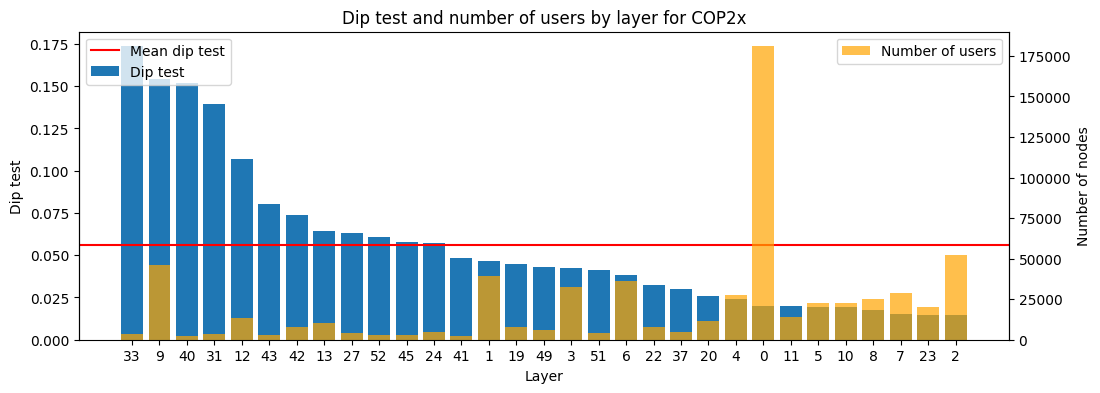

[(33, 'Plastic Waste Recycling'), (9, 'Electric Vehicle Emissions and Sustainable Transport'), (40, 'Blogging on Climate Change and COP'), (31, 'Arts and Films for Climate Change'), (12, 'Canadian Fossil Fuel Funding'), (43, 'Climate Justice and Racial Injustice'), (42, 'Vaccines and COVID-19 Safety for Delegates'), (13, 'African Climate Change and COP'), (27, 'Climate Change Negotiations'), (52, 'Climate Change and Social Media Engagement'), (45, "India's Climate Change Solutions"), (24, 'COP22 in Marrakech, Morocco'), (41, 'Nuclear Power and Climate Change'), (1, 'Carbon Pricing and Low Carbon Emissions Reduction'), (19, 'China-Russia Climate Cooperation'), (49, 'Climate Change Advocacy by Sir David Attenborough'), (3, 'Renewable Energy Sources'), (51, 'Greta Thunberg Activism'), (6, 'COP26 Climate Change Negotiations'), (22, 'Climate Change in Pacific Islands'), (37, "India's Climate Commitment"), (20, 'Indigenous Peoples Rights & Climate Change'), (4, 'Climate Change Finance & Biod

In [2]:
res = get_polarization_by_layer(layers, n_influencers = 100, n = 2)
sorted_topic_label= plot_dip_test(res, layers, topic_label = topic_label, cop_name='COP2x')

# share between the two cops

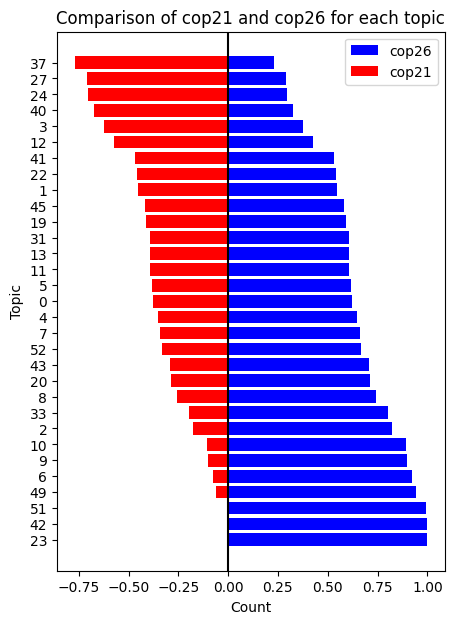

In [3]:
df_transposed = cop_topic.transpose().sort_values(by='cop26', ascending=False).reset_index()
df_transposed = df_transposed[df_transposed['topic'].astype('int').isin(list(res.keys()))]# get topics only in res.keys()
df_transposed['topic'] = df_transposed['topic'].astype('str')

# Create figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

ax.barh(df_transposed['topic'], df_transposed['cop26'], color='b', label='cop26')#  bar for cop26
ax.barh(df_transposed['topic'], -df_transposed['cop21'], color='r', label='cop21')# bar for cop21 in the opposite direction


# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Topic')
ax.set_title('Comparison of cop21 and cop26 for each topic')
ax.axvline(0, color='black')
ax.legend()
plt.show()

topic 12 analysis 

Layer:  21
Number of nodes:  7184
Number of edges:  9177
10  influencers
3045  users connected to influencers
Layer:  26
Number of nodes:  6086
Number of edges:  7860
10  influencers
2761  users connected to influencers


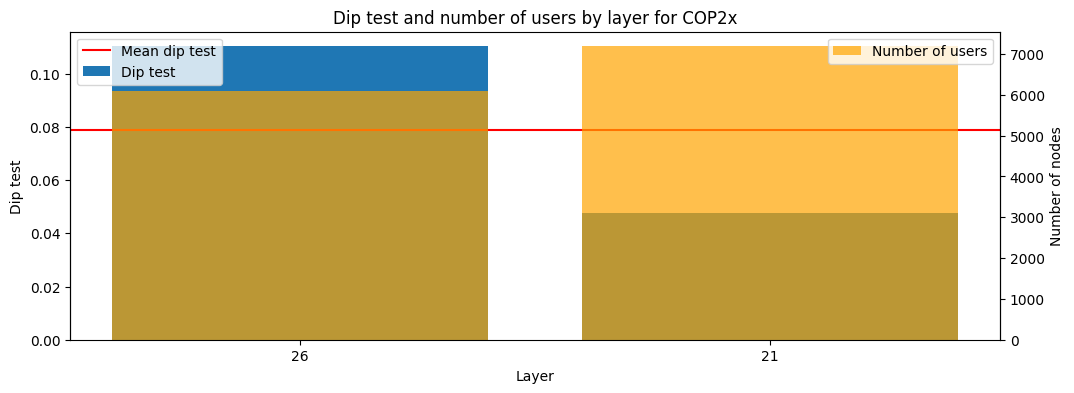

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests


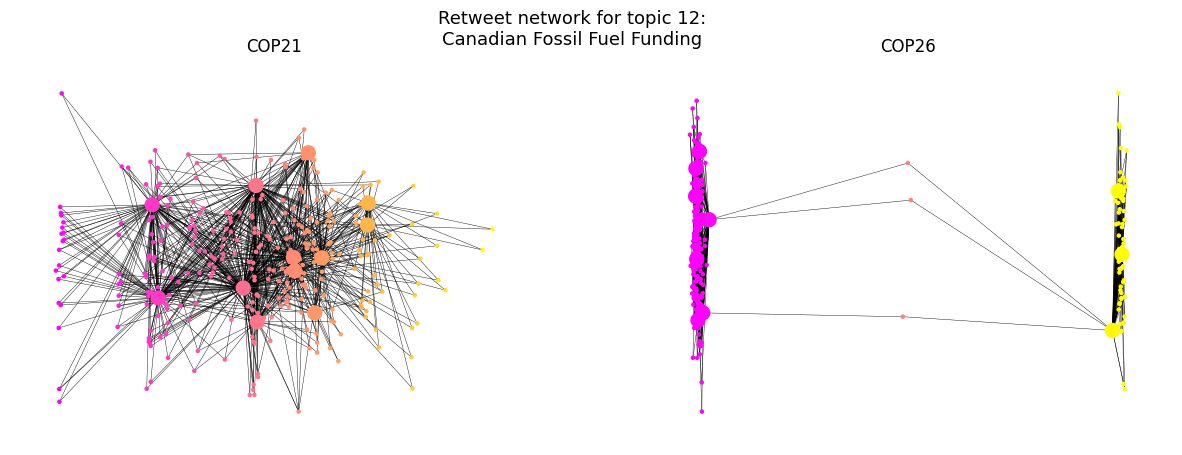

In [40]:
net1221 =  folder + 'networks/network1221.gml'
net1226 =  folder + 'networks/network1226.gml'

net1221 = nx.read_gml(net1221)
net1226 = nx.read_gml(net1226)

l = {21: net1221, 26: net1226}

res12 = get_polarization_by_layer(l, n_influencers = 10, n = 2)


stl = plot_dip_test(res12, l, topic_label = topic_label, cop_name='COP2x')

    # get network and df of correspondence analysis of the users 
 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0] = draw_network(21,ax[0], l, res12)
ax[0].set_title('COP21')
ax[1] = draw_network(26, ax[1], l, res12)
ax[1].set_title('COP26')

# fig title 
fig.suptitle('Retweet network for topic 12:\n'+ topic_label[12], fontsize=13)


plt.show()

In [24]:
topic_label[12]

'Canadian Fossil Fuel Funding'

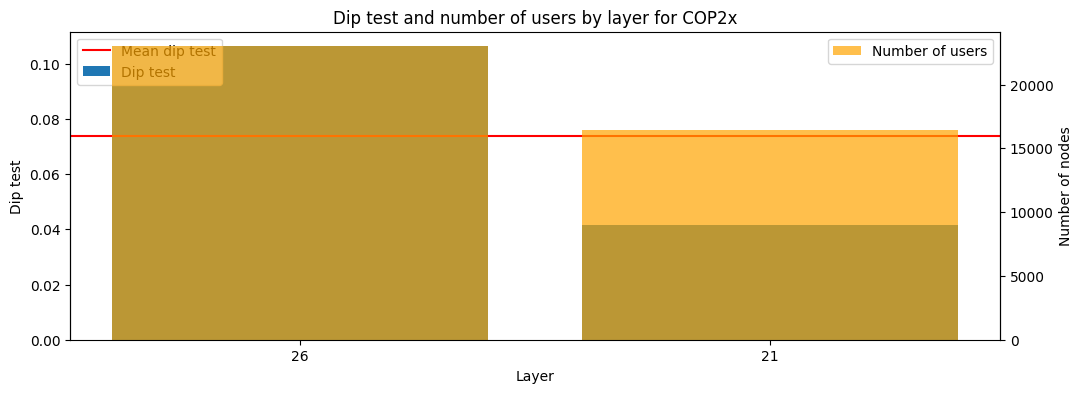

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests


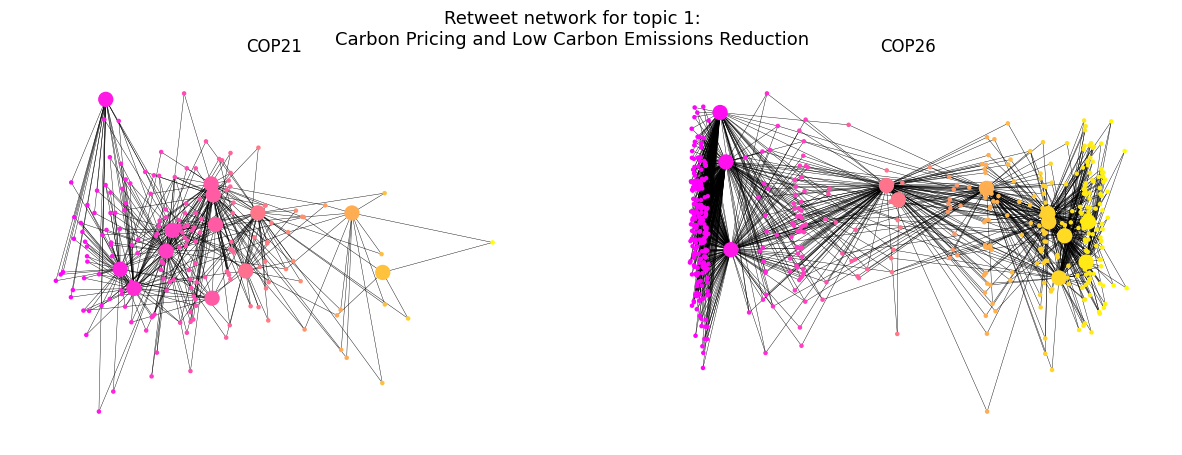

[(21, (0.041480496017231604, 0.03210000955438019)), (26, (0.10631679282484832, 0.0))]


In [39]:
net121 =  folder + 'networks/network121.gml'
net126 = folder + 'networks/network126.gml'

net121 = nx.read_gml(net121)
net126 = nx.read_gml(net126)

l = {21: net121, 26: net126}

#res1 = get_polarization_by_layer(l, n_influencers = 12, n = 2)


stl = plot_dip_test(res1, l, topic_label=topic_label, cop_name='COP2x')


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0] = draw_network(21,ax[0], l, res1)
ax[0].set_title('COP21')
ax[1] = draw_network(26, ax[1], l, res1)
ax[1].set_title('COP26')


# fig title
fig.suptitle('Retweet network for topic 1:\n'+ topic_label[1], fontsize=13)



plt.show()

print([(k, v[0]) for k, v  in res1.items()])


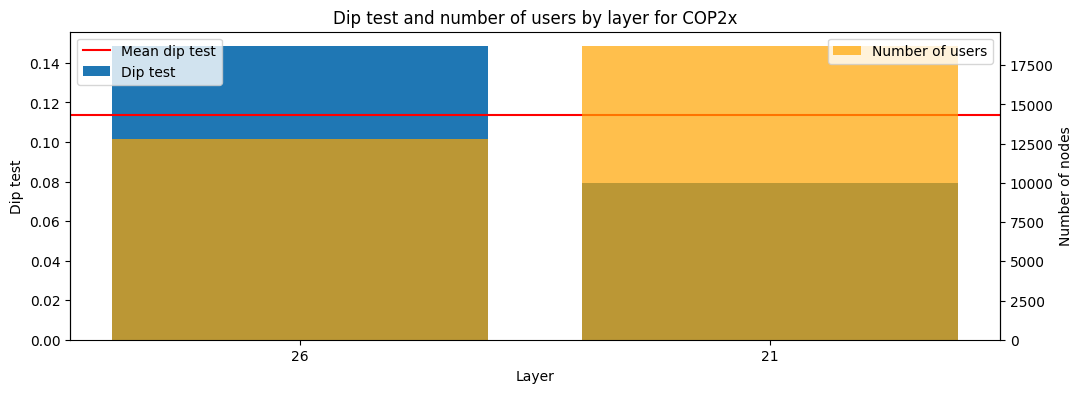

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests


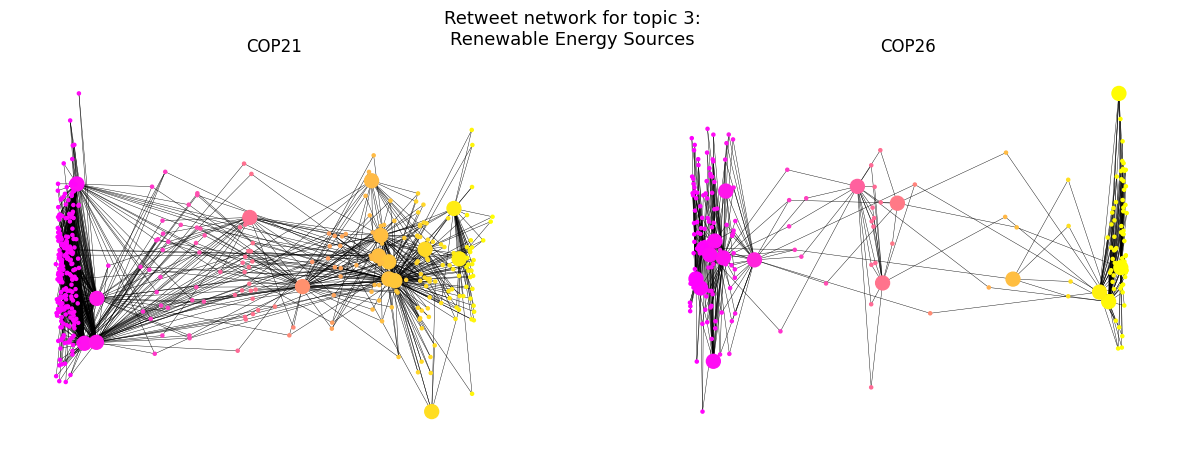

In [41]:
net31 =  folder + 'networks/network321.gml'
net36 = folder + 'networks/network326.gml'

net31 = nx.read_gml(net31)
net36 = nx.read_gml(net36)

l = {21: net31, 26: net36}

#res3 = get_polarization_by_layer(l, n_influencers = 15, n = 2)


stl = plot_dip_test(res3, l, topic_label=topic_label, cop_name='COP2x')


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0] = draw_network(21,ax[0], l, res3)
ax[0].set_title('COP21')
ax[1] = draw_network(26, ax[1], l, res3)
ax[1].set_title('COP26')


# fig title
fig.suptitle('Retweet network for topic 3:\n'+ topic_label[3], fontsize=13)



plt.show()